In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
store_sales=pd.read_csv('data/train.csv',index_col=0)
store_sales_test=pd.read_csv('data/test.csv',index_col=0)
store_sales.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,,,,,,,,,,,,
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [3]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255 entries, 1 to 6255
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    2102 non-null   float64
 5   Promotion2    1592 non-null   float64
 6   Promotion3    1885 non-null   float64
 7   Promotion4    1819 non-null   float64
 8   Promotion5    2115 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   bool   
 11  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 592.5+ KB


In [4]:
store_sales.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [5]:
store_sales['Date']=pd.to_datetime(store_sales['Date'])

In [6]:
store_sales.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### promotion column exploration

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


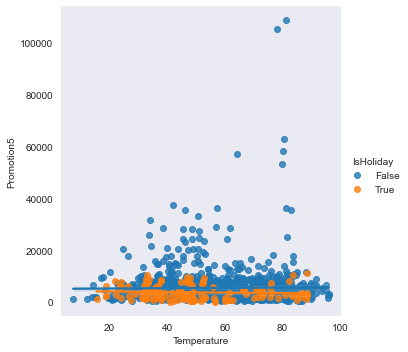

In [7]:
tmpDF=store_sales.dropna()
sns.lmplot('Temperature','Promotion5',data=tmpDF,hue='IsHoliday')

## without promotion column

In [8]:
store_sales_no_promotion=store_sales.drop(['Promotion1',\
    'Promotion2',
    'Promotion3',
    'Promotion4',
    'Promotion5'],axis=1,inplace=False)

In [9]:
labels_no_promotion=store_sales_no_promotion['Weekly_Sales']
attribs_no_promotion=store_sales_no_promotion.drop('Weekly_Sales',axis=1,inplace=False)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(attribs_no_promotion,labels_no_promotion,test_size=.2,random_state=42)

In [11]:
X_train.shape,X_test.shape

((5004, 6), (1251, 6))

In [12]:
X_train.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Unemployment    0
IsHoliday       0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

class LogScaler(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return np.log1p(X)

In [14]:
X_train.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Unemployment    0
IsHoliday       0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

### pipeline

In [16]:
num_attribs=['Temperature','Fuel_Price','Unemployment']
bool_attribs=['IsHoliday']

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

bool_pipeline=Pipeline([
    ('encoder',OrdinalEncoder()),
])

In [17]:
X_train_num=num_pipeline.fit_transform(X_train[num_attribs])
X_train_bool=bool_pipeline.fit_transform(X_train[bool_attribs])

In [18]:
X_train_prepared=np.c_[X_train['Store'],X_train_num,X_train_bool]
X_train_prepared

array([[ 3.        ,  0.91069769,  0.71121179, -0.91623119,  0.        ],
       [23.        , -1.33492533, -0.83597071, -1.48545498,  0.        ],
       [13.        , -0.39527128, -0.95228372,  0.04769792,  0.        ],
       ...,
       [38.        ,  1.47599185,  1.25327431,  2.98134792,  1.        ],
       [39.        ,  0.19147618,  0.63220672, -0.42149036,  0.        ],
       [ 7.        ,  0.0654381 , -1.43070327,  0.54243874,  0.        ]])

In [19]:
pd.DataFrame(X_train_prepared).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### model selection

In [20]:
# model load
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from lightgbm import LGBMRegressor

In [21]:
# load evaluation metrics
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
rf_reg=RandomForestRegressor(n_estimators=500)
xt_reg=ExtraTreeRegressor()
lgbm_reg=LGBMRegressor(n_estimators=1000)

In [24]:
scores=cross_val_score(rf_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error',error_score='raise')
rmse_scores=np.sqrt(-1*scores)

In [25]:
avg_rmse_scores=rmse_scores.mean()
avg_rmse_scores

156625.08129327823

In [26]:
X_test_num=num_pipeline.fit_transform(X_test[num_attribs])
X_test_bool=bool_pipeline.fit_transform(X_test[bool_attribs])
X_test_prepared=np.c_[X_test['Store'],X_test_num,X_test_bool]

In [27]:
test_scores=cross_val_score(rf_reg,X_test_prepared,y_test,cv=5,scoring='neg_mean_squared_error')
rmse_scores_test=np.sqrt(-1*test_scores)
avg_rmse_scores_test=rmse_scores_test.mean()
avg_rmse_scores_test

199271.5196594068

In [28]:
xt_scores=cross_val_score(xt_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error',error_score='raise')
rmse_scores_xt=np.sqrt(-1*xt_scores)
avg_rmse_scores_xt=rmse_scores_xt.mean()
avg_rmse_scores_xt

199619.77925383442

In [29]:
lgbm_scores=cross_val_score(lgbm_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error',error_score='raise')
rmse_scores_lgbm=np.sqrt(-1*lgbm_scores)
avg_rmse_scores_lgbm=rmse_scores_lgbm.mean()
avg_rmse_scores_lgbm

129395.60067094347

### learning curve visualize

In [30]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    scoring,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    fig,axes=plt.subplots(1,1,figsize=(7,7))
    axes.set_title(title)
    axes.set_xlabel("number of examples")
    axes.set_ylabel("score")

    train_sizes,train_scores,test_scores,fit_times,_=learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        scoring=scoring,
        train_sizes=train_sizes,
        return_times=True
    )

    train_scores_mean=-1*np.mean(train_scores,axis=1)
    test_scores_mean=-1*np.mean(test_scores,axis=1)

    axes.plot(
        train_sizes,train_scores_mean,"o-",color="r",label="training score"
    )
    axes.plot(
        train_sizes,test_scores_mean,"o-",color="g",label="cross val score"
    )
    axes.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

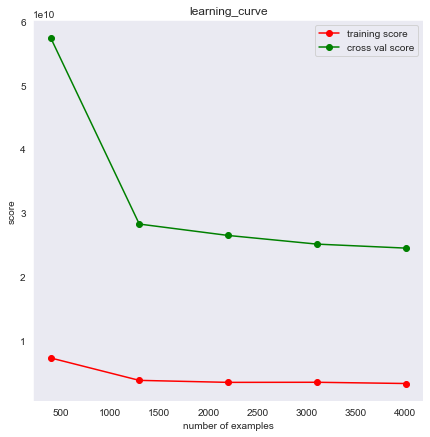

In [31]:
plot_learning_curve(
    rf_reg,"learning_curve",X_train_prepared,y_train,scoring='neg_mean_squared_error',n_jobs=-1
)

# with promotion column

In [32]:
store_sales

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,,,,,,,,,,,,
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
2,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
5,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...
6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6252,45,2012-07-09,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27


<AxesSubplot:xlabel='id'>

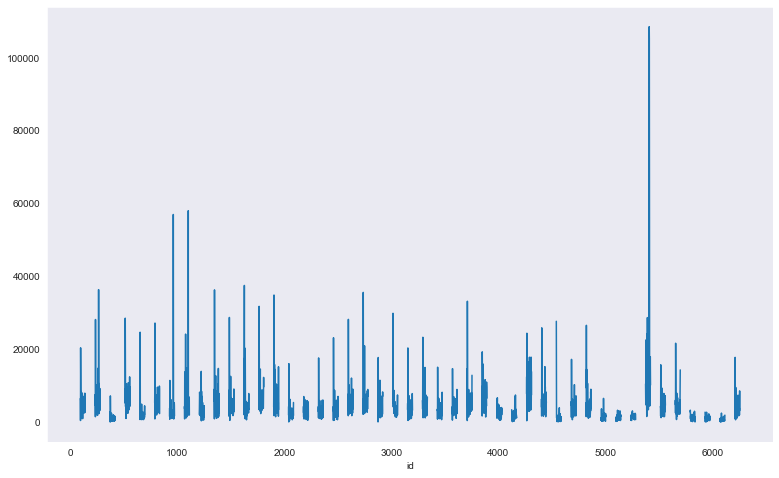

In [33]:
plt.figure(figsize=(13,8))
store_sales.Promotion5.plot()

promotion은 규칙적으로 반복되는 듯하다. 특별한 행사를 주기적으로 하는 것으로 보아 NaN은 0으로 처리하는 것이 좋을 것 같다.

In [34]:
store_sales.Promotion1.iloc[400:500]

id
401    5770.48
402    2014.47
403    1843.45
404    2297.32
405    2625.99
        ...   
496        NaN
497        NaN
498        NaN
499        NaN
500        NaN
Name: Promotion1, Length: 100, dtype: float64

In [35]:
Promotion_columns=\
    [
    'Promotion1',
    'Promotion2',
    'Promotion3',
    'Promotion4',
    'Promotion5'
    ]

In [36]:
for col in Promotion_columns:
    store_sales[col].fillna(0,inplace=True)

In [37]:
store_sales.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

#### outliers check

In [70]:
df=store_sales[['Temperature','Fuel_Price','Promotion1','Promotion2','Promotion3','Promotion4','Weekly_Sales']]

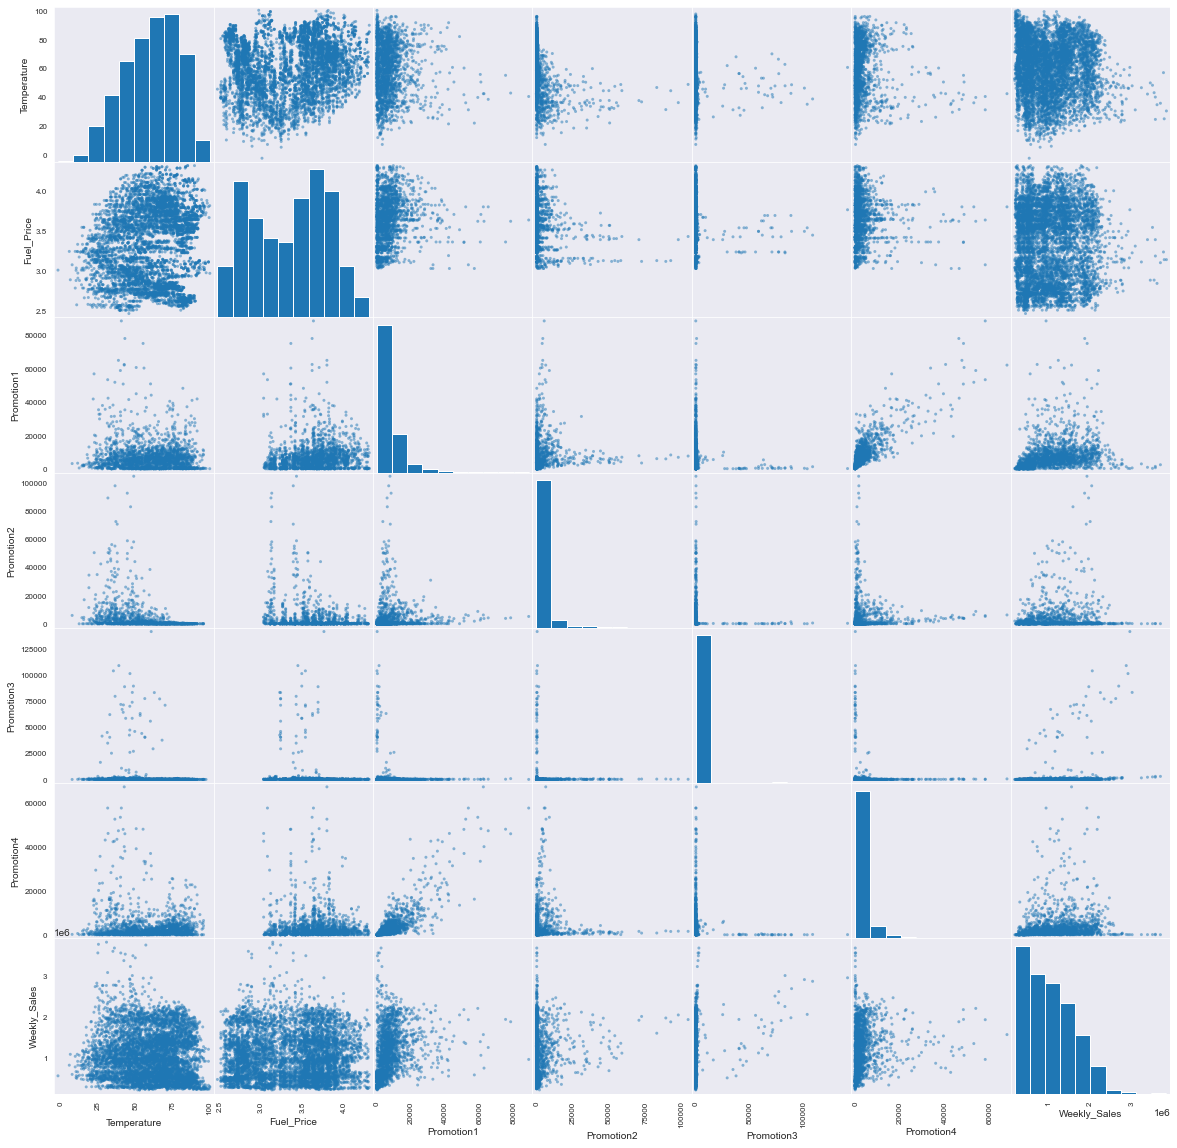

In [73]:
pd.plotting.scatter_matrix(df,figsize=(20,20));

#### attribs setting

In [83]:
log_scale_attribs=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']
std_scale_attribs=['Temperature','Fuel_Price']
bool_attribs=['IsHoliday']

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


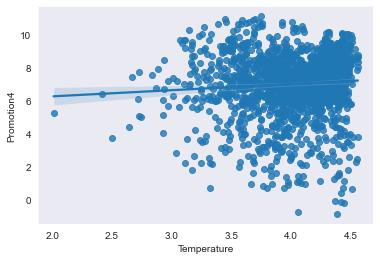

In [79]:
sns.regplot(np.log(store_sales['Temperature']),np.log(store_sales['Promotion4']));

### scaler pipeline

In [201]:
def pseudo_log1p(X):
    res=np.array([])

    for i in range(len(X)):
        tmp=[]
        for j in range(len(X[0])):
            if X[i][j]>0:
                tmp.append(np.log(1+X[i][j]))
            else:
                tmp.append(-np.log(1-X[i][j]))
        
        if i==0:
            res=np.array([tmp])
        else:
            res=np.concatenate((res,[tmp]))
    
    return res

In [197]:
pseudo_log1p(store_sales['Promotion1'])

KeyError: 0

In [168]:
from sklearn.pipeline import Pipeline,TransformerMixin
from sklearn.base import BaseEstimator

class LogScaler(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return pseudo_log1p(X)

In [169]:
class MyImputer(BaseEstimator,TransformerMixin):
    def __init__(self,fill_value):
        self.fill_value=fill_value
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X=X.fillna(self.fill_value)
        return (X)

In [170]:
# check the range, negative value --> log trans X
store_sales['Promotion4'].describe()

count     1819.000000
mean      3465.952501
std       6413.116294
min          0.410000
25%        499.895000
50%       1532.630000
75%       3640.905000
max      67474.850000
Name: Promotion4, dtype: float64

In [171]:
store_sales.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [172]:
store_sales.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
Promotion1             float64
Promotion2             float64
Promotion3             float64
Promotion4             float64
Promotion5             float64
Unemployment           float64
IsHoliday                 bool
Weekly_Sales           float64
dtype: object

In [202]:
log_scale_attribs_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='constant',fill_value=0)),
    ('log_scaler',LogScaler())
])
num_attribs_pipline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])
bool_attribs_pipeline=Pipeline([
    ('encoder',OrdinalEncoder()),
])

In [203]:
store_sales_num=num_attribs_pipline.fit_transform(store_sales[num_attribs])
store_sales_log=log_scale_attribs_pipeline.fit_transform(store_sales[log_scale_attribs])
store_sales_bool=bool_attribs_pipeline.fit_transform(store_sales[bool_attribs])

In [204]:
store_sales_log

array([[-0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ],
       ...,
       [ 9.34215341, -0.        ,  1.66770682,  8.13819084,  8.56977046],
       [ 9.04230035,  4.53560572,  4.16262607,  7.77375432,  9.06778553],
       [ 8.42455364,  3.07454345,  0.91629073,  7.37901437,  8.09841485]])

In [205]:
store_sales_prepared=pd.DataFrame(np.c_[store_sales_num,store_sales_log,store_sales_bool],columns=num_attribs+log_scale_attribs+bool_attribs)

In [206]:
store_sales_prepared.isnull().sum()

Temperature     0
Fuel_Price      0
Unemployment    0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
IsHoliday       0
dtype: int64

In [207]:
store_sales_labels=store_sales['Weekly_Sales']

### train-valid set split

In [208]:
X_train,X_valid,y_train,y_valid=train_test_split(store_sales_prepared,store_sales_labels,test_size=.2,random_state=42)

In [209]:
X_train.shape,X_test.shape

((5004, 9), (1251, 6))

In [210]:
X_train.columns

Index(['Temperature', 'Fuel_Price', 'Unemployment', 'Promotion1', 'Promotion2',
       'Promotion3', 'Promotion4', 'Promotion5', 'IsHoliday'],
      dtype='object')

## model selection

In [211]:
rf_reg=RandomForestRegressor(n_estimators=1000)
xt_reg=ExtraTreeRegressor()
lgbm_reg=LGBMRegressor(n_estimators=1000)

In [212]:
## models: rf_reg,xt_reg,lgbm_reg
train_scores_rf=cross_val_score(rf_reg,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
train_scores_xt=cross_val_score(xt_reg,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
train_scores_lgbm=cross_val_score(lgbm_reg,X_train,y_train,cv=5,scoring='neg_mean_squared_error')

test_scores_rf=cross_val_score(rf_reg,X_valid,y_test,cv=5,scoring='neg_mean_squared_error')
test_scores_xt=cross_val_score(xt_reg,X_valid,y_test,cv=5,scoring='neg_mean_squared_error')
test_scores_lgbm=cross_val_score(lgbm_reg,X_valid,y_test,cv=5,scoring='neg_mean_squared_error')

rmse_train_scores_rf=np.sqrt(-1*train_scores_rf)
avg_rmse_train_scores_rf=rmse_train_scores_rf.mean()
rmse_train_scores_xt=np.sqrt(-1*train_scores_xt)
avg_rmse_train_scores_xt=rmse_train_scores_xt.mean()
rmse_train_scores_lgbm=np.sqrt(-1*train_scores_lgbm)
avg_rmse_train_scores_lgbm=rmse_train_scores_lgbm.mean()

rmse_test_scores_rf=np.sqrt(-1*test_scores_rf)
avg_rmse_test_scores_rf=rmse_test_scores_rf.mean()
rmse_test_scores_xt=np.sqrt(-1*test_scores_xt)
avg_rmse_test_scores_xt=rmse_test_scores_xt.mean()
rmse_test_scores_lgbm=np.sqrt(-1*test_scores_lgbm)
avg_rmse_test_scores_lgbm=rmse_test_scores_lgbm.mean()

In [213]:
pd.DataFrame(
    data=[
            [avg_rmse_train_scores_rf,avg_rmse_train_scores_xt,avg_rmse_train_scores_lgbm],
            [avg_rmse_test_scores_rf,avg_rmse_test_scores_xt,avg_rmse_test_scores_lgbm]
        ],
    columns=['Random Forest','Extra Tree','LGBM'],
    index=['train scores','test scores']
    )

,Random Forest,Extra Tree,LGBM
train scores,470457.095305,611555.831548,473906.119518
test scores,506631.921535,696887.275525,560782.282860


In [216]:
rf_reg.fit(X_train,y_train)

rf_reg.feature_importances_

array([0.23236871, 0.15091076, 0.30410766, 0.04653248, 0.0214111 ,
       0.06886845, 0.03970397, 0.12865852, 0.00743834])

### feature importance visualization

In [221]:
def visualize_coeff(model):
    coeff=pd.Series(model.feature_importances_,index=X_train.columns)
    sorted_coeff=coeff.sort_values(ascending=False)

    sns.barplot(x=sorted_coeff.values,y=sorted_coeff.index)

In [223]:
lgbm_reg.fit(X_train,y_train)

LGBMRegressor(n_estimators=1000)

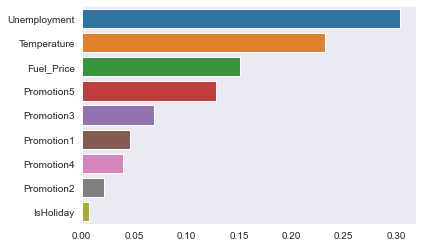

In [225]:
visualize_coeff(rf_reg)

## lgbm parameter tuning

### bayesian opt

In [51]:
%pip install bayesian-optimization

from bayes_opt import BayesianOptimization

Note: you may need to restart the kernel to use updated packages.


In [52]:
lgbm_params_bound={
    'n_estimators':[1000],
    'reg_alpha':[],
    'num_leaves':[],
    'max_depth':[],
    'colsample_bytree':[],
    'bagging_fraction':[.25,.5,.75]
}

### gridsearch

In [53]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,300,1000],
    'num_leaves':[15,30,50,70],
    'max_depth':[7,10],
    'num_iterations':[300,1000,3000],
    'colsample_bytree':[.7,.9],
    "bagging_fraction": [.25,.5,.75]
}

gridcv=GridSearchCV(lgbm_reg,param_grid=params,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')

In [54]:
def lgbm_bo()

SyntaxError: invalid syntax (2318352974.py, line 1)

In [ ]:
BO_lgbm

In [ ]:
gridcv.fit(
    X_train_prepared,y_train,
    eval_metric='neg_mean_squared_error',
    eval_set=[(X_test_prepared,y_test)],
    early_stopping_rounds=100,
    )

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=1.0 will be ignored. Current value: bagging_fraction=0.25
[1]	valid_0's l2: 2.93814e+11
[2]	valid_0's l2: 2.58185e+11
[3]	valid_0's l2: 2.29898e+11
[4]	valid_0's l2: 2.21481e+11
[5]	valid_0's l2: 1.98218e+11
[6]	valid_0's l2: 1.82219e+11
[7]	valid_0's l2: 1.65059e+11
[8]	valid_0's l2: 1.5027e+11
[9]	valid_0's l2: 1.3662e+11
[10]	valid_0's l2: 1.26613e+11
[11]	valid_0's l2: 1.18891e+11
[12]	valid_0's l2: 1.16234e+11
[13]	valid_0's l2: 1.08939e+11
[14]	valid_0's l2: 1.03551e+11
[15]	valid_0's l2: 9.88849e+10
[16]	valid_0's l2: 9.67664e+10
[17]	valid_0's l2: 9.54688e+10
[18]	valid_0's l2: 8.85005e+10
[19]	valid_0's l2: 8.37969e+10
[20]	valid_0's l2: 8.3174e+10
[21]	valid_0's l2: 7.78804e+10
[22]	valid_0's l2: 7.4825e+10
[23]	valid_0's l2: 7.13515e+10
[24]	valid_0's l2: 6.73279e+10
[25]	valid_0's l2: 6.44099e+10
[26]	valid_0's l2: 6.40842e+10
[27]	valid_0's l2: 6.34983e+10
[28]	valid_0's l2: 6.29607e+10
[29]	valid_0's l2: 6.0037e

GridSearchCV(cv=3, estimator=LGBMRegressor(n_estimators=1000), n_jobs=-1,
             param_grid={'bagging_fraction': [0.25, 0.5, 0.75],
                         'colsample_bytree': [0.7, 0.9], 'max_depth': [7, 10],
                         'n_estimators': [100, 300, 1000],
                         'num_iterations': [300, 1000, 3000],
                         'num_leaves': [15, 30, 50, 70]},
             scoring='neg_mean_squared_error')

In [ ]:
print('best params : ',gridcv.best_params_)
print('best RMSE score : ',np.sqrt(-1*gridcv.best_score_))

best params :  {'bagging_fraction': 0.25, 'colsample_bytree': 0.7, 'max_depth': 7, 'n_estimators': 100, 'num_iterations': 1000, 'num_leaves': 15}
best RMSE score :  122720.99959406834


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` i

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

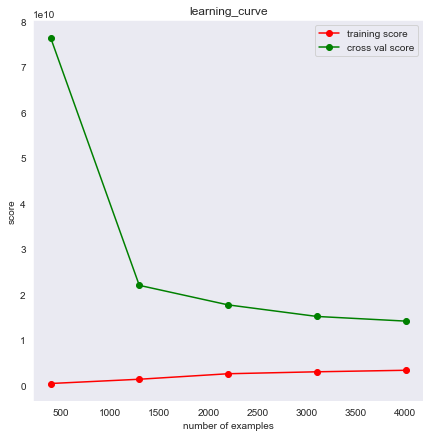

In [ ]:
lgbm_reg=LGBMRegressor(n_estimators=1000,max_depth= 7, num_leaves= 15,colsample_bytree=.7,num_iterations=1000)
plot_learning_curve(lgbm_reg,"learning_curve",X_train_prepared,y_train,scoring='neg_mean_squared_error',cv=5)

# Submission

In [ ]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
175,176,0
176,177,0
177,178,0
178,179,0


In [ ]:
#labels_with_promotion
attribs_with_promotion[num_attribs]

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment
id,,,,,,,,
1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106
2,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106
3,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106
4,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106
5,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106
...,...,...,...,...,...,...,...,...
6251,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684
6252,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684
6253,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684


In [ ]:
train_set_num=num_pipeline.fit_transform(attribs_with_promotion[num_attribs])
train_set_bool=bool_pipeline.fit_transform(attribs_with_promotion[bool_attribs])
train_set_prepared=np.c_[attribs_with_promotion['Store'],train_set_num,train_set_bool]
train_set_prepared

array([[ 1.00000000e+00, -9.84244609e-01, -1.69629326e+00, ...,
        -3.71302790e-01,  4.09469975e-02,  0.00000000e+00],
       [ 1.00000000e+00, -1.18829769e+00, -1.74900255e+00, ...,
        -3.71302790e-01,  4.09469975e-02,  1.00000000e+00],
       [ 1.00000000e+00, -1.11204627e+00, -1.82367404e+00, ...,
        -3.71302790e-01,  4.09469975e-02,  0.00000000e+00],
       ...,
       [ 4.50000000e+01,  3.88280843e-01,  1.32570607e+00, ...,
         9.09036505e-01,  3.49258929e-01,  0.00000000e+00],
       [ 4.50000000e+01,  2.51350487e-01,  1.52336591e+00, ...,
         1.73559081e+00,  3.49258929e-01,  0.00000000e+00],
       [ 4.50000000e+01,  2.27723289e-01,  1.43332087e+00, ...,
         4.27736802e-01,  3.49258929e-01,  0.00000000e+00]])

In [ ]:
lgbm_reg.fit(train_set_prepared,labels_with_promotion)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMRegressor(colsample_bytree=0.7, max_depth=7, n_estimators=1000,
              num_iterations=1000, num_leaves=15)

In [ ]:
store_sales_test

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
id,,,,,,,,,,,
1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...
176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False


In [ ]:
test_set_num=num_pipeline.fit_transform(store_sales_test[num_attribs])
test_set_bool=bool_pipeline.fit_transform(store_sales_test[bool_attribs])
test_set_prepared=np.c_[store_sales_test['Store'],test_set_num,test_set_bool]
test_set_prepared

array([[ 1.        ,  0.67441992, -0.86300567, ...,  0.06087172,
        -0.23953133,  0.        ],
       [ 1.        ,  0.14117129, -0.92142514, ...,  0.86230754,
        -0.23953133,  0.        ],
       [ 1.        ,  0.61879326, -0.94698366, ..., -0.39668297,
        -0.23953133,  0.        ],
       ...,
       [45.        , -0.6759651 ,  0.53541038, ...,  0.18782992,
         1.07794693,  0.        ],
       [45.        , -0.48414905,  0.42222266, ..., -0.66682102,
         1.07794693,  0.        ],
       [45.        , -0.25588795,  0.10456679, ..., -0.90344267,
         1.07794693,  0.        ]])

In [ ]:
prediction=lgbm_reg.predict(test_set_prepared)
prediction

array([1515177.10382844, 1499448.10086905, 1636602.23440537,
       1473319.19930459, 1764125.09545283, 2318178.29328867,
       1958792.64535709, 2102297.12538022,  568340.32058834,
        594374.59785925,  499729.9853454 ,  541027.32145429,
       2356356.65239315, 2370376.30099943, 2274701.84317675,
       2216373.98506227,  404988.35750695,  383716.94577918,
        438453.66536976,  433212.32581887, 2044250.34549587,
       1392700.6438705 , 1492156.52356412, 1607245.67233629,
        550273.64124208,  513572.38426003,  517775.51147679,
        576690.69246018,  904358.97429827,  786313.16566207,
       1000308.16117183,  964401.12748092,  647851.47587214,
        508720.90120136,  563088.10819562,  682892.34718552,
       2113472.8604173 , 1734626.34755351, 2302358.30998369,
       1770605.1929046 , 1602966.83394667, 1154944.47168412,
       1921639.36265518, 1536115.19526071, 1480984.91391686,
        989179.6438254 , 1027514.06243992, 1407615.71784016,
       2319035.34159004,

In [ ]:
sample_submission['Weekly_Sales']=prediction
sample_submission

,id,Weekly_Sales
0,1,1.515177e+06
1,2,1.499448e+06
2,3,1.636602e+06
3,4,1.473319e+06
4,5,1.764125e+06
...,...,...
175,176,1.813072e+05
176,177,7.640447e+05
177,178,7.124911e+05
178,179,7.281757e+05


## without promotion

In [ ]:
store_sales_test.drop(['Date','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'],axis=1,inplace=True)

In [ ]:
store_sales_test_num=num_pipeline.fit_transform(store_sales_test[num_attribs])
store_sales_test_bool=bool_pipeline.fit_transform(store_sales_test[bool_attribs])

KeyError: "['Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5'] not in index"

In [ ]:
test_data_prepared=np.c_[store_sales_test['Store'],store_sales_test_num,store_sales_test_bool]
test_data_prepared

array([[ 1.00000000e+00,  6.74419920e-01, -8.63005671e-01,
        -2.39531334e-01,  0.00000000e+00],
       [ 1.00000000e+00,  1.41171288e-01, -9.21425140e-01,
        -2.39531334e-01,  0.00000000e+00],
       [ 1.00000000e+00,  6.18793264e-01, -9.46983658e-01,
        -2.39531334e-01,  0.00000000e+00],
       [ 1.00000000e+00,  7.32923817e-01, -1.26829074e+00,
        -2.39531334e-01,  0.00000000e+00],
       [ 2.00000000e+00,  8.39381727e-01, -8.63005671e-01,
        -4.93086129e-01,  0.00000000e+00],
       [ 2.00000000e+00, -5.25629272e-02, -9.21425140e-01,
        -4.93086129e-01,  0.00000000e+00],
       [ 2.00000000e+00,  6.29343147e-01, -9.46983658e-01,
        -4.93086129e-01,  0.00000000e+00],
       [ 2.00000000e+00,  7.93345874e-01, -1.26829074e+00,
        -4.93086129e-01,  0.00000000e+00],
       [ 3.00000000e+00,  1.07627455e+00, -8.63005671e-01,
        -5.78653008e-01,  0.00000000e+00],
       [ 3.00000000e+00,  8.43218048e-01, -9.21425140e-01,
        -5.78653008e-01

In [ ]:
rf_reg.fit(train_set_prepared,train_set_labels)
prediction=rf_reg.predict(test_data_prepared)
prediction

array([1547643.37938   , 1536803.25853999, 1595882.2471    ,
       1517121.1436    , 1839425.23402   , 1925699.1481    ,
       1870021.73342   , 1839285.96672   ,  442145.75776   ,
        436417.98612   ,  442630.87694   ,  435848.38736   ,
       2961051.04494001, 2971723.99050001, 2969826.54676001,
       2950719.05020001,  327019.66476   ,  328290.23898   ,
        333490.65136   ,  325424.69292   , 1561098.80132   ,
       1569267.6949    , 1580781.97154   , 1717995.306     ,
        556128.11502   ,  552729.22632   ,  575373.06706   ,
        537548.5608    ,  955977.73922   , 1007501.69348   ,
        964410.75718   ,  949888.575     ,  745651.62666   ,
        748891.39252   ,  745832.6436    ,  744994.80882   ,
       1794205.77868001, 1802545.26252   , 1750397.0046    ,
       1799602.85903999, 1334183.12814   , 1320895.34114   ,
       1344872.46066   , 1339007.91468   ,  965930.12554   ,
       1008172.99464   , 1014627.89376   , 1034226.23338   ,
       1980362.15108   ,

In [ ]:
lgbm_reg.fit(X_train_prepared,y_train)
prediction=lgbm_reg.predict(test_data_prepared)
prediction

array([1577674.81495496, 1615607.18117972, 1624965.73115326,
       1504792.63696673, 1900869.67819044, 1895608.53701191,
       1940147.99699403, 1784049.59385344,  429171.3208327 ,
        429171.3208327 ,  476462.237031  ,  381538.23039102,
       2254643.74993125, 2284966.9142249 , 2276817.2648911 ,
       2246947.1646744 ,  315116.80151721,  307104.2041225 ,
        354395.1203208 ,  292939.38777598, 1504869.73307568,
       1532094.98178137, 1545764.80985847, 1540946.91796829,
        480461.27201673,  511865.68233237, 1024641.07512726,
        630988.61610797,  834990.41451775,  837520.31400651,
        944757.9883538 ,  875601.46784784,  569251.75477067,
        518702.69806546,  600734.10822971,  550772.15040442,
       1762827.37321318, 1758896.08861412, 1757504.15017435,
       1753736.19018513, 1327071.46304745, 1327071.46304745,
       1358553.8165065 , 1281678.8454186 ,  996699.12351848,
        997597.84487533, 1022632.84935877, 1029368.50137676,
       1935246.99495521,

In [ ]:
sample_submission['Weekly_Sales']=prediction
sample_submission

,id,Weekly_Sales
0,1,1.577675e+06
1,2,1.615607e+06
2,3,1.624966e+06
3,4,1.504793e+06
4,5,1.900870e+06
...,...,...
175,176,3.008189e+05
176,177,7.715593e+05
177,178,8.121766e+05
178,179,7.911312e+05


In [ ]:
#sample_submission.to_csv('submission0721_lgbm.csv',index=False)
#sample_submission.to_csv('submission/submission0731_lgbm.csv',index=False)
sample_submission.to_csv('submission/submission0801_lgbm_tuned2.csv',index=False)

In [ ]:
sample_submission

,id,Weekly_Sales
0,1,1.515177e+06
1,2,1.499448e+06
2,3,1.636602e+06
3,4,1.473319e+06
4,5,1.764125e+06
...,...,...
175,176,1.813072e+05
176,177,7.640447e+05
177,178,7.124911e+05
178,179,7.281757e+05
